# EDA Pinguinos

Instalacion de librerias que necesitaremos

In [ ]:
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info


  Using cached packaging-24.1-py3-none-any.whl (53 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Not uninstalling packaging at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'packaging'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


Importacion de las librerias

In [ ]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

Diferente formas de Cargar Datos

In [ ]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


## Datos Preprocesados

In [ ]:
preprocessed_penguins_df = palmerpenguins.load_penguins()
preprocessed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Usando Seaborn

In [ ]:
sns.load_dataset("penguins")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Usando pandas

In [ ]:
raw_penguins_df2=pd.read_csv("EDAPinguinos/penguins_raw.csv")
preprocessed_penguins_df2=pd.read_csv("EDAPinguinos/penguins.csv")


## Exploracion de datos

Revisar el tipo de dato de las variables

In [ ]:
preprocessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

contar cuantas variables por tipo

In [ ]:
preprocessed_penguins_df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

Observamos la cantidad de variables y observaciones (dimenciones

In [ ]:
preprocessed_penguins_df.shape

(344, 8)

Revisar si hay nulos

In [ ]:
preprocessed_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [ ]:
preprocessed_penguins_df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

sumar los nulos

In [ ]:
preprocessed_penguins_df.isnull().sum().sum()

19

Proporcion de valores nulos por cada variable

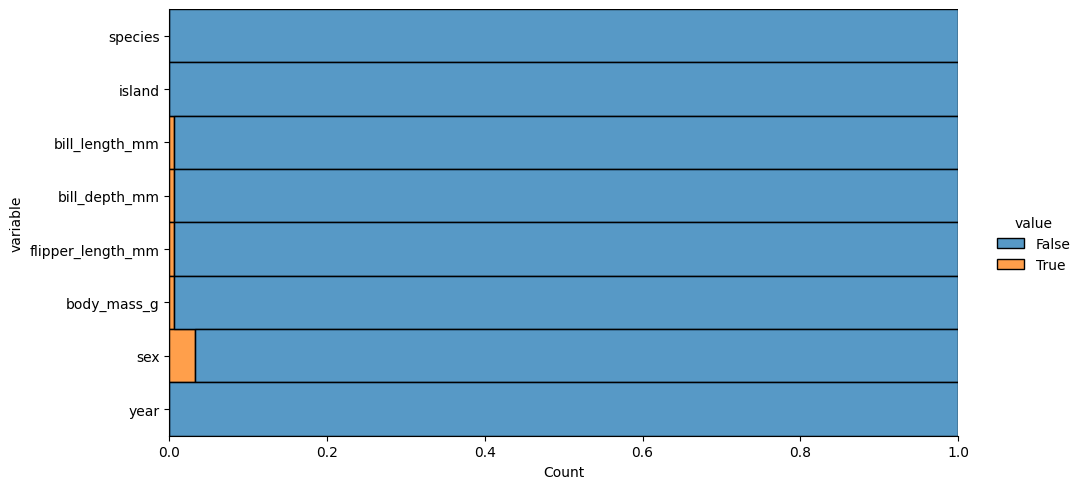

In [ ]:
preprocessed_penguins_df.isnull().melt().pipe(
    lambda df: (
        sns.displot(
            data=df,
            y="variable",
            hue="value",
            multiple="fill",
            aspect=2
        )
    )
)

Visualizar los valores nulos en todo el conjunto de datos

<AxesSubplot: >

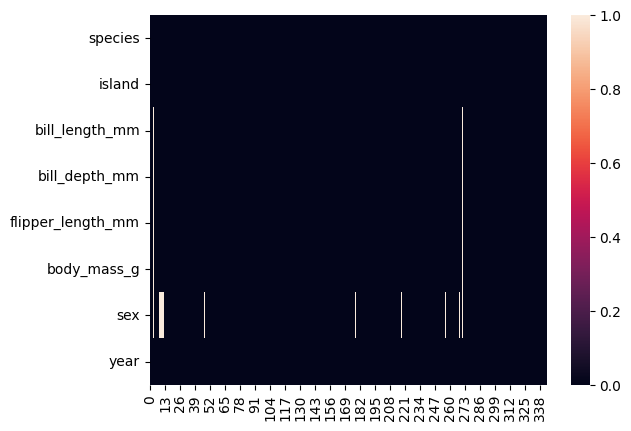

In [ ]:
preprocessed_penguins_df.isnull().transpose().pipe(
    lambda df: (
        sns.heatmap(
            data=df
        )
    )
)

Eliminar datos

In [ ]:
processed_penguins_df = preprocessed_penguins_df.dropna()
processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Informacion de los datos

In [ ]:
processed_penguins_df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


variables numericas

In [ ]:
processed_penguins_df.describe(include="number")

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Tipo object

In [ ]:
processed_penguins_df.describe(include="object")

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


Cambiando object a category

In [ ]:
processed_penguins_df.astype({"species": "category", "island": "category", "sex": "category", "year": "category","sex": "category"}).dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                 category
dtype: object

# Visualizar datos

<AxesSubplot: >

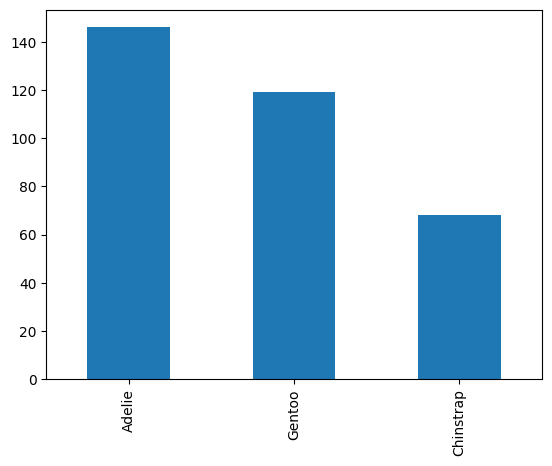

In [ ]:
#visualizar datos con pandas

processed_penguins_df.species.value_counts().plot(kind="bar")

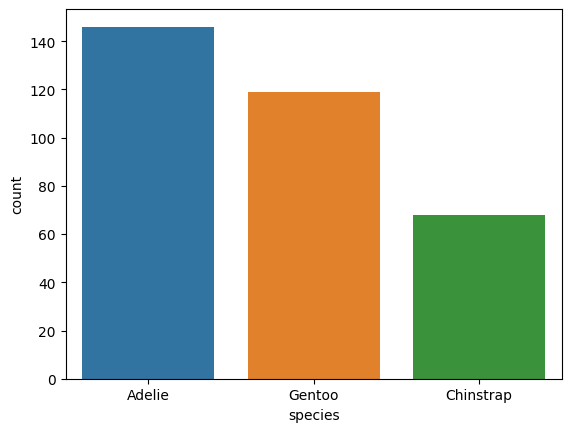

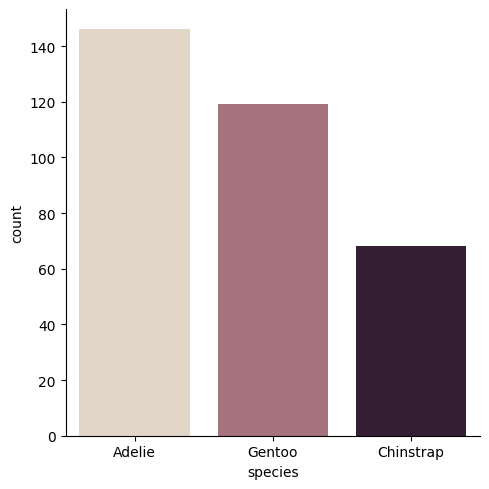

In [ ]:
#visualizar datos con seaborn

sns.countplot(x="species", data=processed_penguins_df )

sns.catplot(
    data=processed_penguins_df,
    x="species",
    kind="count",
    palette="ch:.25",
)

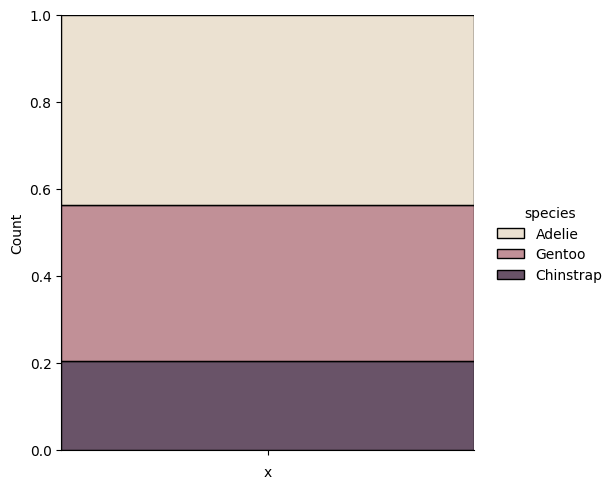

In [ ]:
processed_penguins_df.add_column('x','').pipe(
    lambda df: (
        sns.displot(
            data=df,
            x="x",
            hue="species",
            multiple="fill",
            palette="ch:.25",
        )
    )
)

Revisamos medidas de tendencia central

In [ ]:
#media o promedio
processed_penguins_df.bill_depth_mm.mean()
# con numpy
np.mean(processed_penguins_df.bill_depth_mm)

#de todas la variables

processed_penguins_df.mean()

/tmp/ipykernel_192/2938874249.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

mediana

In [ ]:
#mediana
processed_penguins_df.median()

/tmp/ipykernel_192/3843172588.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

Moda

In [ ]:
# moda

processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


otra forma para variables categoricas

In [ ]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


Medidas de dispersion 

<img src="image-20240807-210537.png" width="" align="" />

<img src="image-20240807-210715.png" width="" align="" />

<img src="image-20240807-210852.png" width="" align="" />

Maximo de las variables

In [ ]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

Minimos

In [ ]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

Rango

In [ ]:
processed_penguins_df.max( numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

desviacion standar

In [ ]:
processed_penguins_df.std()

/tmp/ipykernel_192/4261057176.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [ ]:
processed_penguins_df.mean()- processed_penguins_df.std()

/tmp/ipykernel_192/2332358904.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()- processed_penguins_df.std()
/tmp/ipykernel_192/2332358904.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()- processed_penguins_df.std()


bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

Rango intercuarticulico

In [ ]:
processed_penguins_df.quantile(0.75)

/tmp/ipykernel_192/3609120765.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75)


bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [ ]:
processed_penguins_df.quantile(0.75)-processed_penguins_df.quantile(0.25)

/tmp/ipykernel_192/1736177706.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75)-processed_penguins_df.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [ ]:
processed_penguins_df.quantile(q=[0.25,0.5,0.75]).T.rename_axis("variable").reset_index().assign(
    iqr=lambda df: df[0.75] - df[0.25]
)

/tmp/ipykernel_192/3356738394.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(q=[0.25,0.5,0.75]).T.rename_axis("variable").reset_index().assign(


,variable,0.25,0.5,0.75,iqr
0,bill_length_mm,39.5,44.5,48.6,9.1
1,bill_depth_mm,15.6,17.3,18.7,3.1
2,flipper_length_mm,190.0,197.0,213.0,23.0
3,body_mass_g,3550.0,4050.0,4775.0,1225.0
4,year,2007.0,2008.0,2009.0,2.0


Graficamos

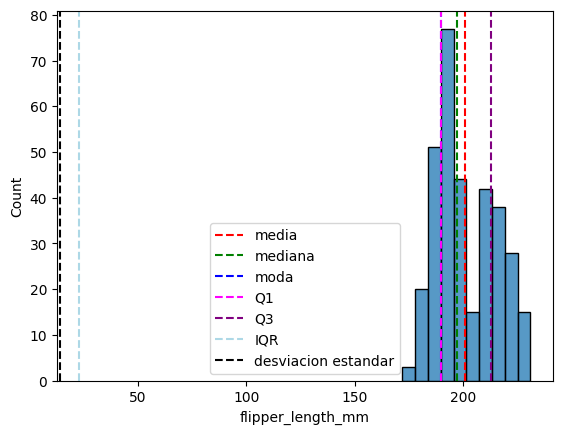

In [ ]:
sns.histplot(
    data=processed_penguins_df,
    x="flipper_length_mm"
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color="red",
    linestyle="--",
    label="media"
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color="green",
    linestyle="--",
    label="mediana"
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode()[0],
    color="blue",
    linestyle="--",
    label="moda"
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color="magenta",
    linestyle="--",
    label="Q1"
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color="purple",
    linestyle="--",
    label="Q3"
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75)-processed_penguins_df.flipper_length_mm.quantile(0.25),
    color="lightblue",
    linestyle="--",
    label="IQR"
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.std(),
    color="black",
    linestyle="--",
    label="desviacion estandar"
)
plt.legend()


<AxesSubplot: xlabel='flipper_length_mm'>

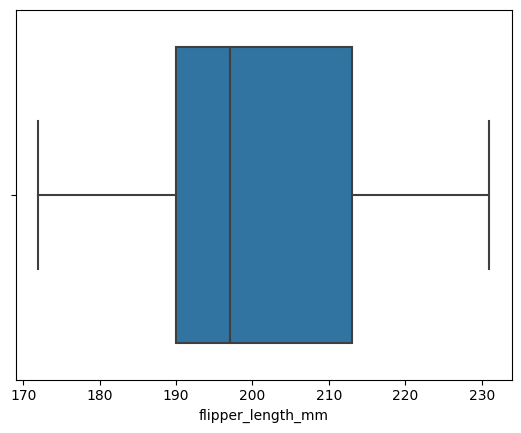

In [ ]:
sns.boxplot(
    data=processed_penguins_df,
    x="flipper_length_mm"
)

# Distribuciones

Funcion de probabilidad de masa

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

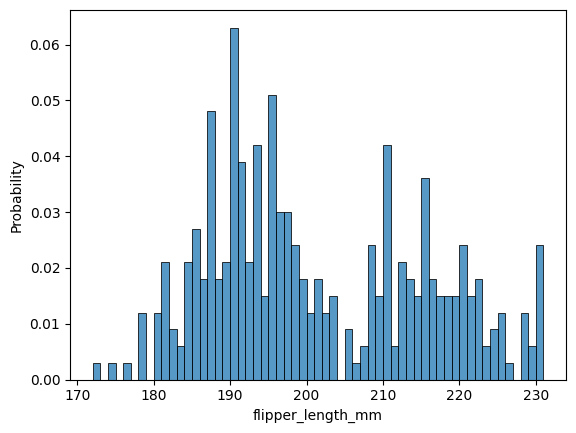

In [ ]:
sns.histplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    binwidth=1,
    stat="probability"
    
)

In [ ]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
    )

pmf_flipper_length_mm

,probs
172.0,0.003003
174.0,0.003003
176.0,0.003003
178.0,0.012012
180.0,0.012012
181.0,0.021021
182.0,0.009009
183.0,0.006006
184.0,0.021021
185.0,0.027027


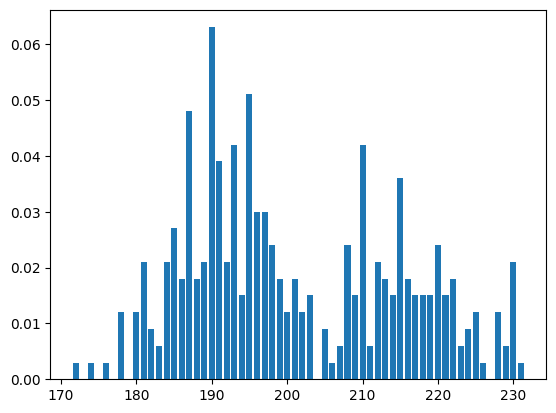

In [ ]:
pmf_flipper_length_mm.bar()

In [ ]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [ ]:
processed_penguins_df.flipper_length_mm.max()

231.0

Funciones Empiricas de probabilidad acumulada (ECDFs)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

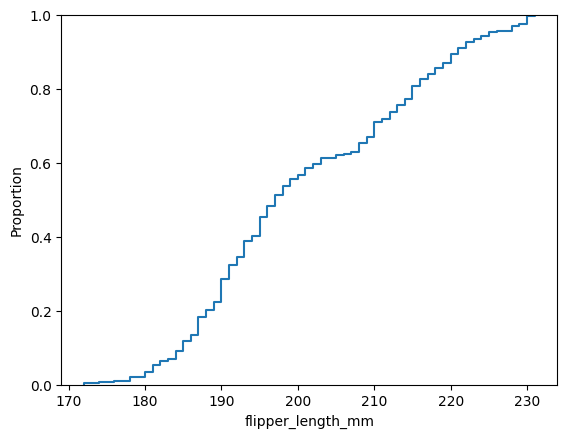

In [ ]:
sns.ecdfplot(
    data=processed_penguins_df,
    x="flipper_length_mm"
)

<AxesSubplot: >

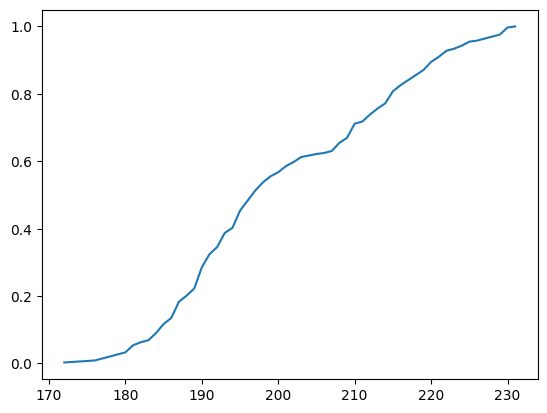

In [ ]:
#empiricaldist

cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm
)

cdf_flipper_length_mm.plot()

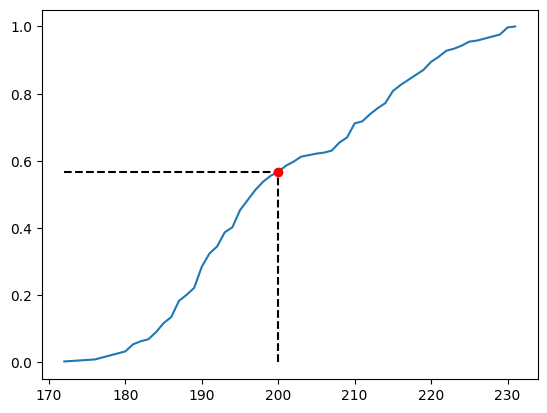

In [ ]:
q=200
p=cdf_flipper_length_mm.forward(q)

cdf_flipper_length_mm.plot()
plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color="black",
    linestyle="dashed"
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color="black",
    linestyle="dashed"
)
plt.plot(q,p,'ro')

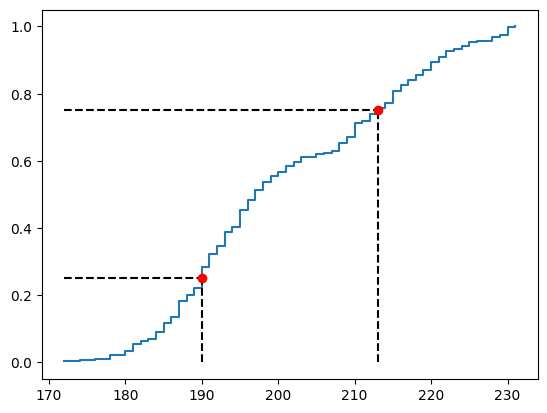

In [ ]:
cdf_flipper_length_mm.step()

p_1=0.25
p_2=0.75

ps=(0.25,0.75)
qs=cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color="black",
    linestyle="dashed"
)
plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color="black",
    linestyle="dashed"
)
plt.scatter(
    x=qs,
    y=ps,
    color="red",
    zorder=2
)

Estadistica Descriptiva Aplicada: Distribuciones
Funcion de Probabilidad de masas (PMFs)
Nos dice la probabilidad de que una variable aleatoria discreta tome un valor determinado. Ejemplo, la probabilidad de que en un salon hayan personas con una edad especifica

Funcion de Distribucion Acumulada (CDFs)
Devuelve la probabilidad de que una variable sea igual o menor que un valor determinado. Ejemplo, la probabilidad de que en un salon hayan personas menores o iguales a una edad especifica.

Función de Probabilidad de Densidad (PDFs)
Determine la probabilidad de que una variable continua tome un valor determinado. Ejemplo, la probabilidad de que en el salón hayan personar con una altura especifica

Comparar distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

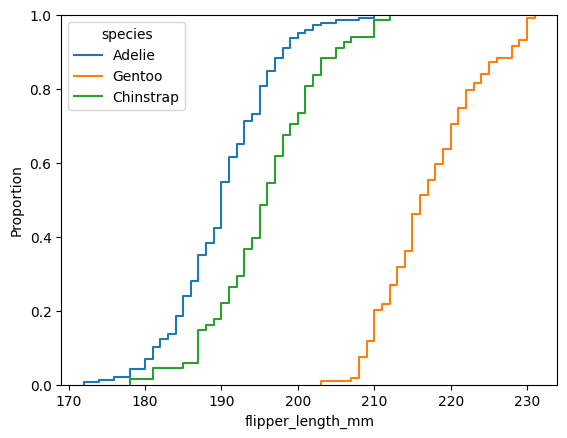

In [ ]:
sns.ecdfplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    hue="species"
)

In [ ]:
pmf_flipper_length_mm.describe()

count     54.000000
mean     200.966967
std       13.994705
min        0.003003
25%      190.000000
50%      197.000000
75%      213.000000
max        0.063063
Name: , dtype: float64

Funciones de desidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

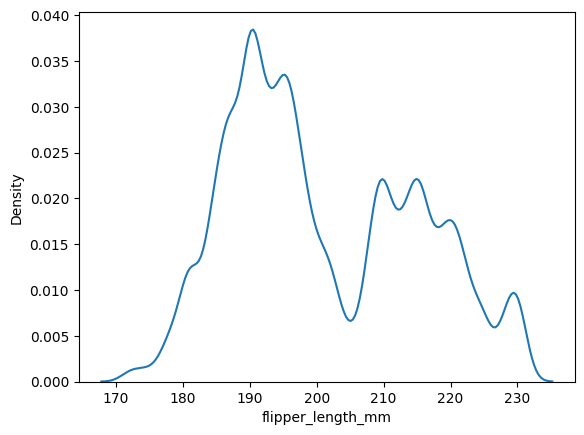

In [ ]:
sns.kdeplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    bw_method=0.1
)

In [ ]:
stats= processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot: >

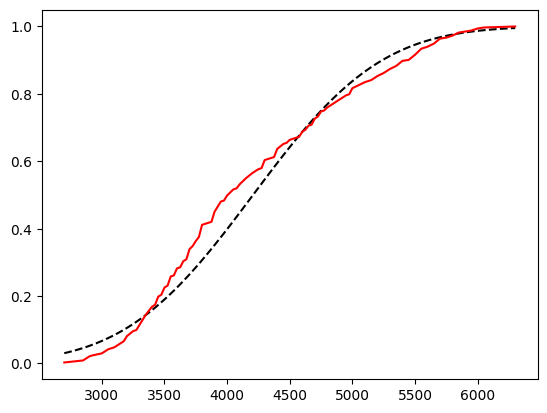

In [ ]:
xs=np.linspace(stats["min"],stats["max"],100)
ys=scipy.stats.norm(stats["mean"],stats["std"]).cdf(xs)

plt.plot(xs,ys,color="black",linestyle="dashed")

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
    ).plot(color="red")

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

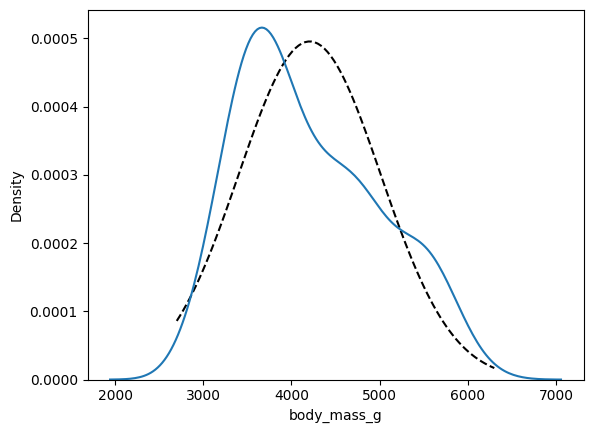

In [ ]:
xs=np.linspace(stats["min"],stats["max"],100)
ys=scipy.stats.norm(stats["mean"],stats["std"]).pdf(xs)

plt.plot(xs,ys,color="black",linestyle="dashed")

sns.kdeplot(
    data=processed_penguins_df,
    x="body_mass_g"
)

Ley de los grandes numeros

<img src="image-20240809-174806.png" width="" align="" />

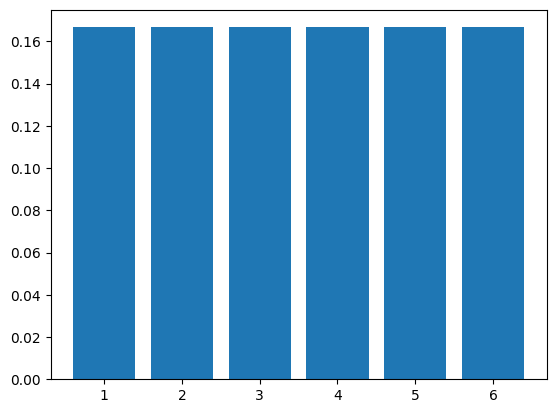

In [ ]:
dice= empiricaldist.Pmf.from_seq([1,2,3,4,5,6])

dice.bar()

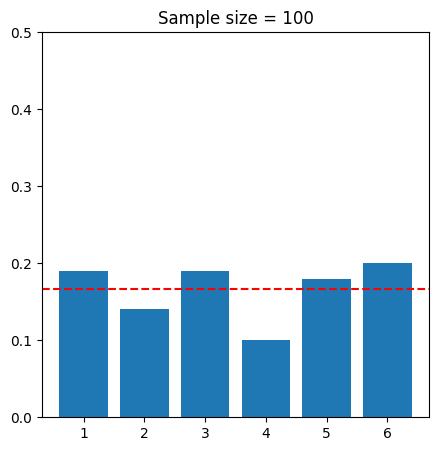

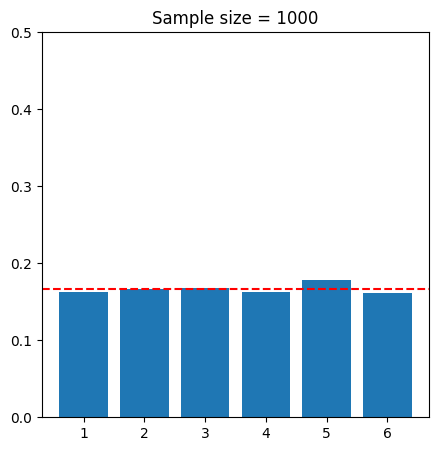

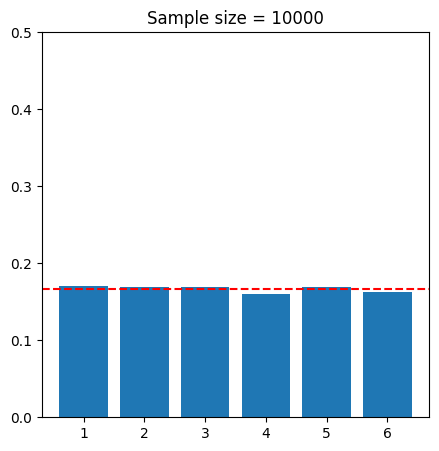

In [ ]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5, 5))
    sample_pmf.bar()    
    plt.axhline(y=1/6, color="red", linestyle="dashed")
    plt.ylim([0,0.50])
    plt.title(f"Sample size = {sample_size}")



Teorema de Limite Central

<img src="image-20240809-174834.png" width="" align="" />

<img src="image-20240809-174853.png" width="" align="" />

In [ ]:
processed_penguins_df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [ ]:
sex_numeric=processed_penguins_df.sex.replace(['male','female'],[1,0])

In [ ]:
number_samples =1000
sample_size=35

np.random.seed(42)

samples_list = []

for i in range(1,number_samples+1):
    sex_numeric_sample =sex_numeric.sample(sample_size,replace=True).to_numpy()
    samples_list.append(pd.DataFrame({f"sample_{i}": sex_numeric_sample}))

samples_df = pd.concat(samples_list, axis=1)
male_population_mean = samples_df.mean().mean()
print(f"Estimated percenta of male penguis in population: {male_population_mean*100:.4f}%")

Estimated percenta of male penguis in population: 50.1829%


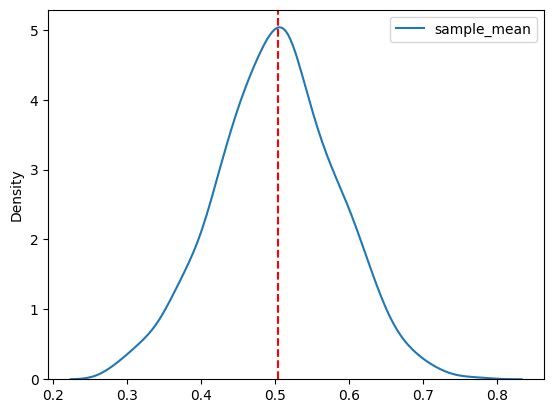

In [ ]:
samples_means_binomial=pd.DataFrame(samples_df.mean(),columns=["sample_mean"])

sns.kdeplot(data=samples_means_binomial)
plt.axvline(x=sex_numeric.mean(),color="red",linestyle="dashed")

# Relaciones entre puntos y variables

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

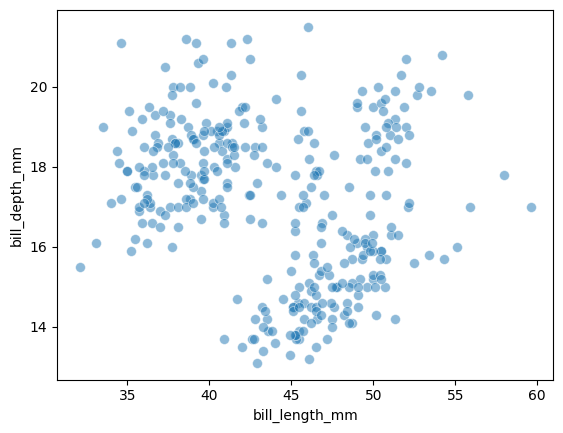

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    alpha=0.5,
    s=50
)

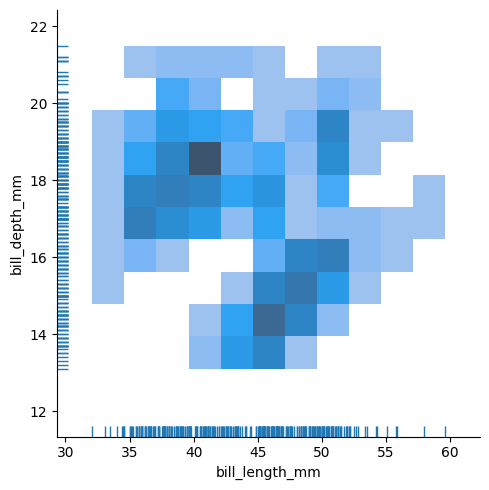

In [ ]:
sns.displot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    rug=True
)

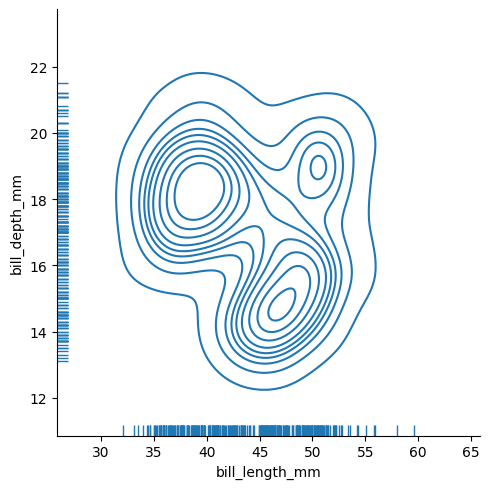

In [ ]:
sns.displot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    rug=True,
    kind="kde"
)

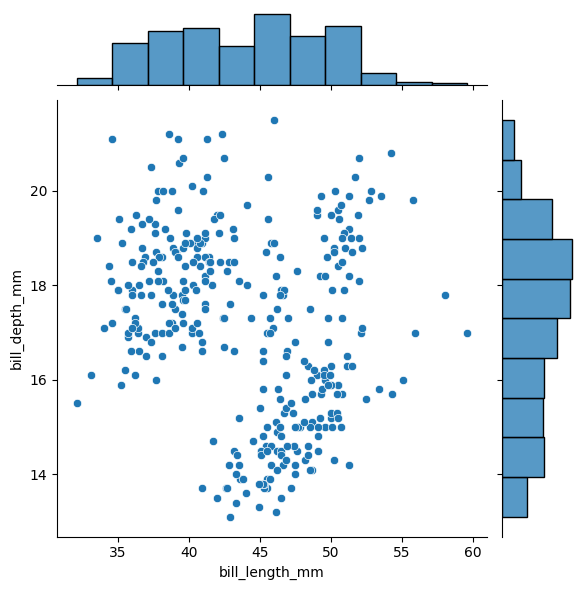

In [ ]:
sns.jointplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
)

## Relaciones :grafica de violin y boxplots

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

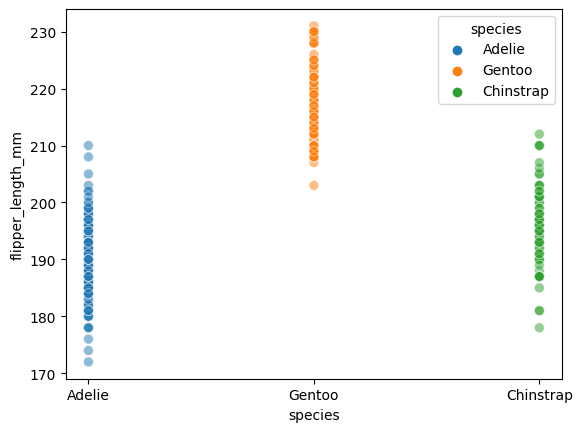

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x="species",
    y="flipper_length_mm",
    hue="species",
    alpha=0.5,
    s=50
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

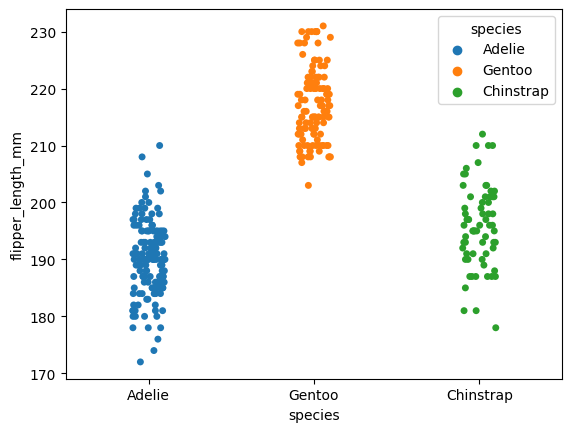

In [ ]:
sns.stripplot(
    data=processed_penguins_df,
    x="species",
    y="flipper_length_mm",
    hue="species"
)


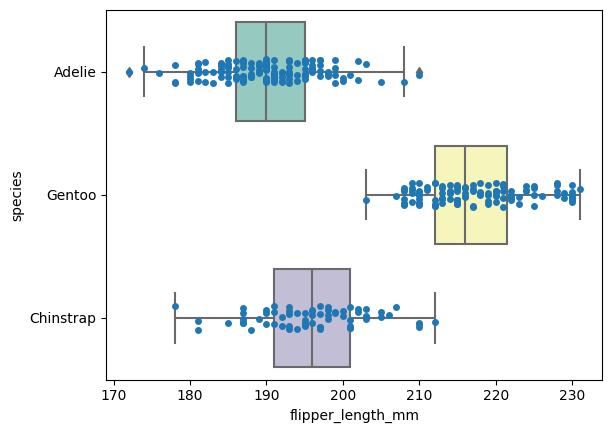

In [ ]:
ax=sns.boxplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    y="species",
    palette="Set3"
)
ax=sns.stripplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    y="species",
)


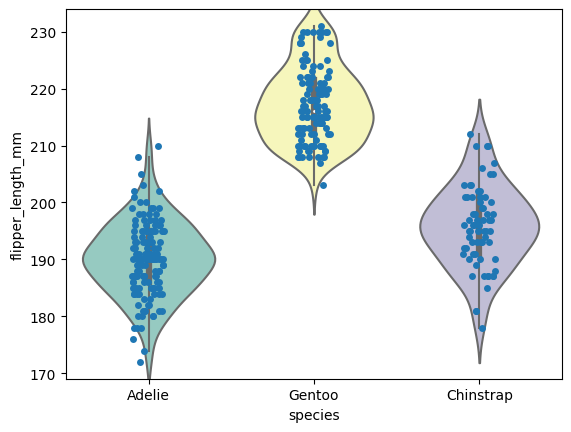

In [ ]:
ax=sns.violinplot(
    data=processed_penguins_df,
    y="flipper_length_mm",
    x="species",
    palette="Set3"
)
ax=sns.stripplot(
    data=processed_penguins_df,
    y="flipper_length_mm",
    x="species",
)

/tmp/ipykernel_192/3729968874.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

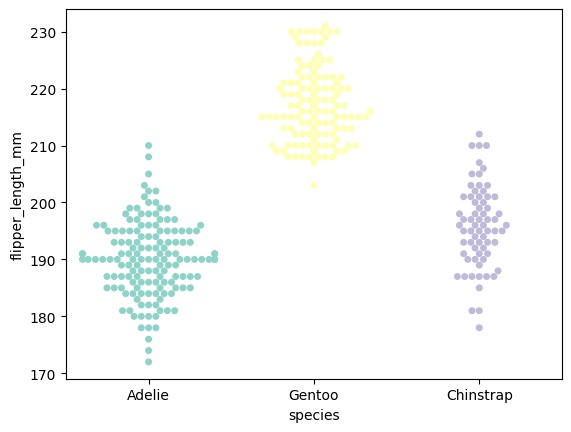

In [ ]:
sns.swarmplot(
    data=processed_penguins_df,
    x="species",
    y="flipper_length_mm",
    palette="Set3"
)

Peso de los pingunos por islas

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

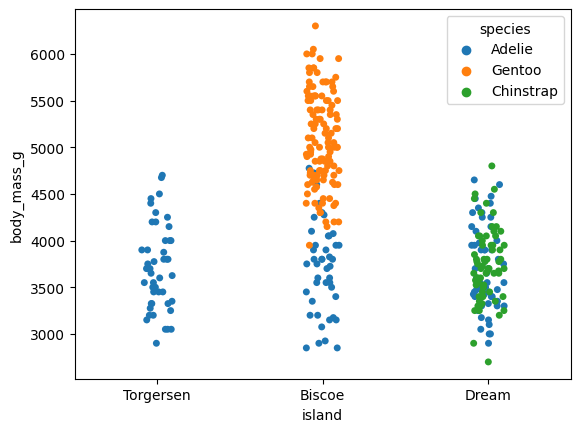

In [ ]:
sns.stripplot(
    data=processed_penguins_df,
    x="island",
    y="body_mass_g",
    hue="species"
)

Matrices de Correlación
La correlación expresa hasta que punto dos variables estan relacionadas entre si. Es decir, si cambian conjuntamente. Para cuantificar que tanto estan relacionadas, se utiliza el concepto de Coeficiente de Correlacion.

Coeficiente de Correlación: cuantifica la intensidad de la relación lineal entre dos variables en un análisis de correlación

<img src="image-20240816-153401.png" width="" align="" />

La Correlación no implica causalidad. Causalidad implica “Cuando algo (la causa) genera otra cosa (efecto)

<img src="image-20240816-153422.png" width="" align="" />

Viendo correlacion entre variables

In [ ]:
processed_penguins_df.corr()

/tmp/ipykernel_192/4090656914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


/tmp/ipykernel_192/1745892866.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


<AxesSubplot: >

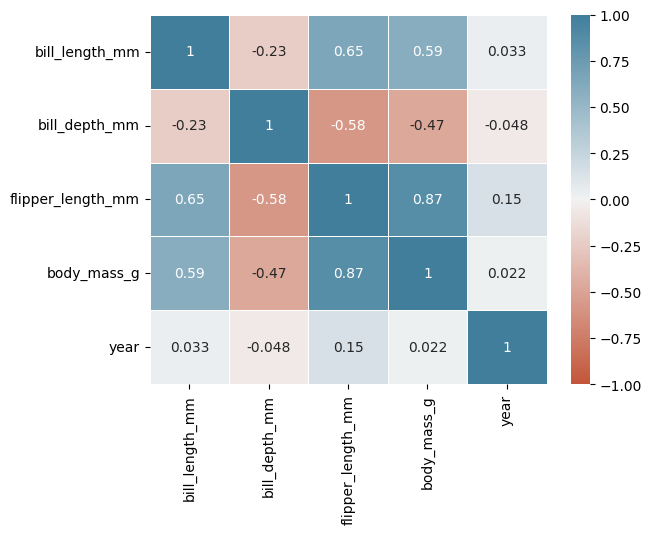

In [ ]:
sns.heatmap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=0.5,
    annot=True
)

/tmp/ipykernel_192/2032888681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


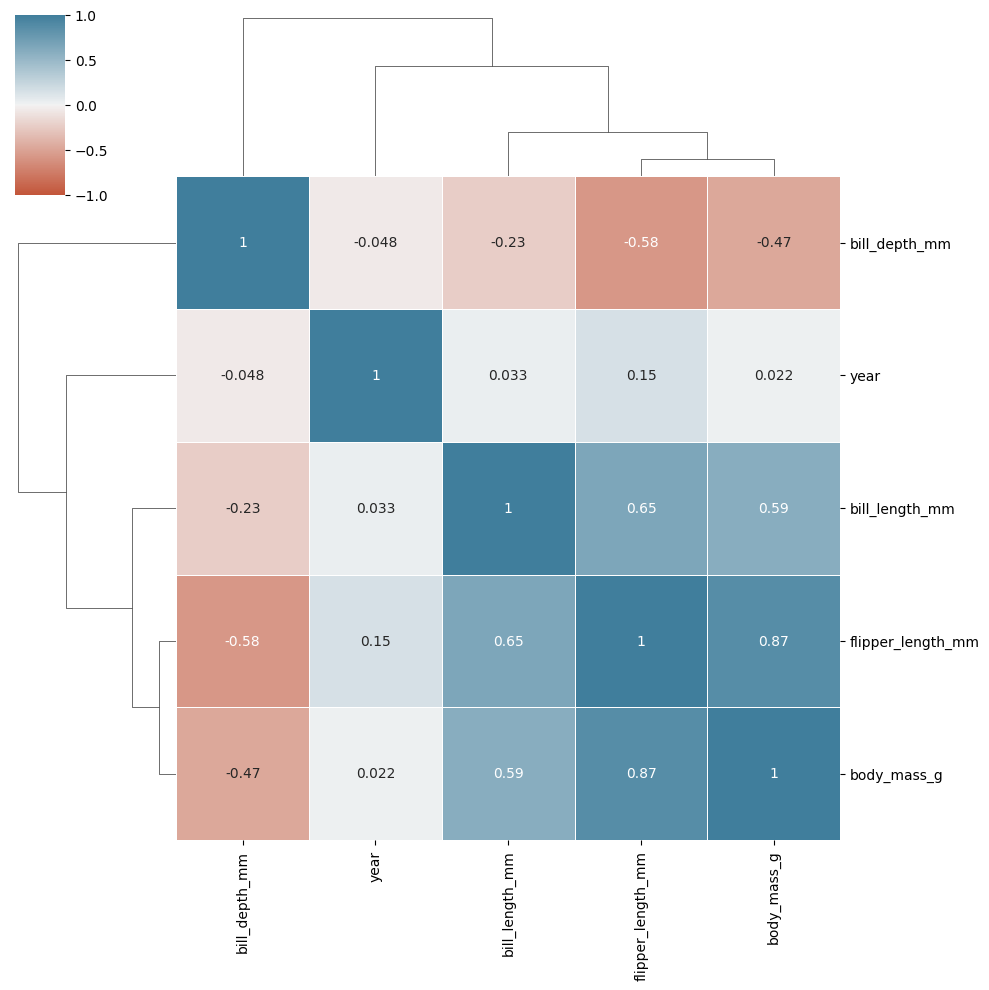

In [ ]:
sns.clustermap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=0.5,
    annot=True
)

In [ ]:
processed_penguins_df=processed_penguins_df.assign(
    numeric_sex=lambda df:df["sex"].replace(["male","female"],[1,0])
)

/tmp/ipykernel_192/2032888681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


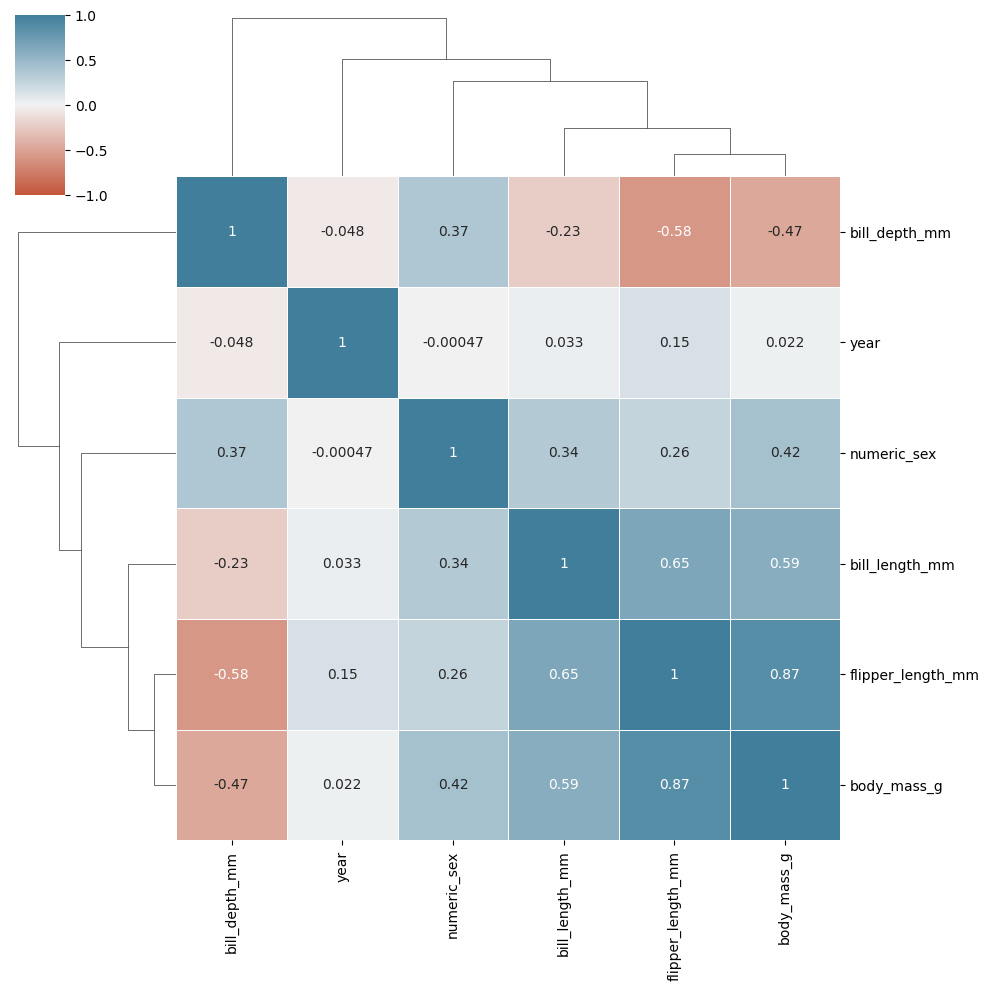

In [ ]:
sns.clustermap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=0.5,
    annot=True
)

ver que tipo de relacion hay

array([[ 1.        , -0.07336699],
       [-0.07336699,  1.        ]])

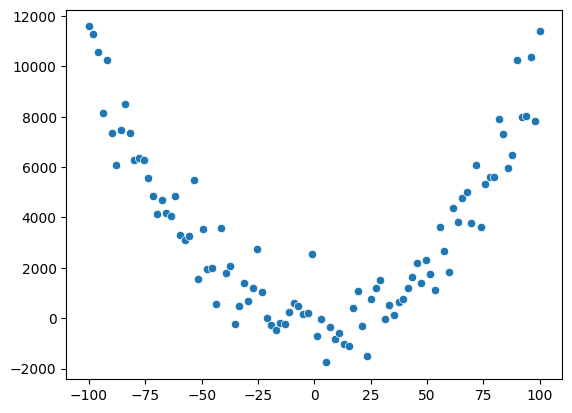

In [ ]:
x=np.linspace(-100,100,100)
y=x**2
y+=np.random.normal(0,1000,x.size)

sns.scatterplot(x=x,y=y)
np.corrcoef(x,y)

array([[1.       , 0.9165443],
       [0.9165443, 1.       ]])

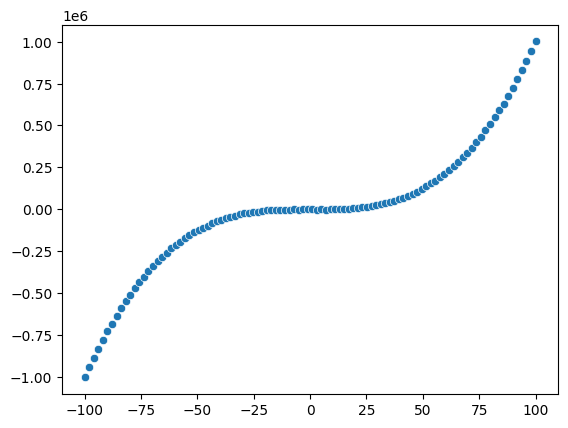

In [ ]:
x=np.linspace(-100,100,100)
y=x**3
y+=np.random.normal(0,1000,x.size)

sns.scatterplot(x=x,y=y)
np.corrcoef(x,y)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

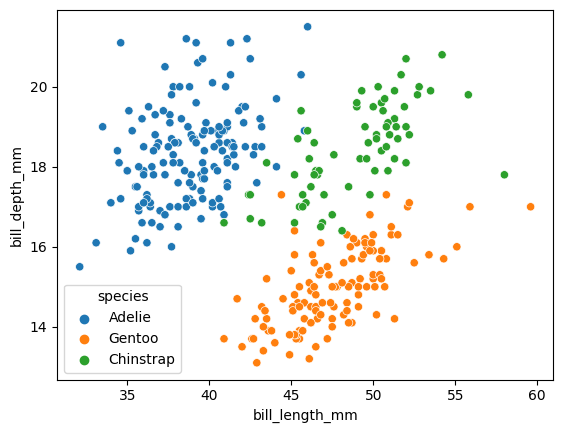

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",

)

Analisis de regresion simple

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


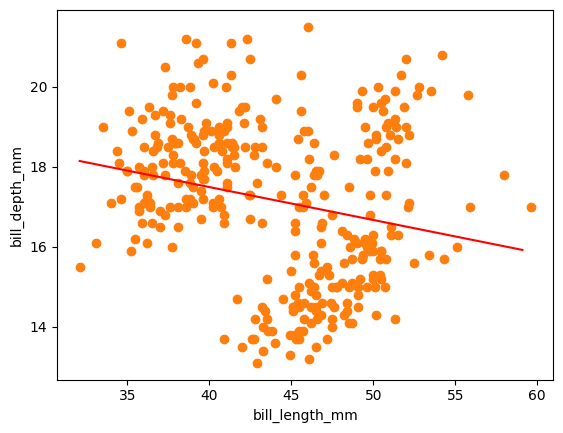

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",

)

res_penguins=scipy.stats.linregress(
    x=processed_penguins_df.bill_length_mm,
    y=processed_penguins_df.bill_depth_mm
)

print(res_penguins)

fx_1=np.arange(processed_penguins_df.bill_length_mm.min(),processed_penguins_df.bill_length_mm.max())
fy_1=res_penguins.slope*fx_1+res_penguins.intercept

plt.plot(fx_1,fy_1,color="red")
plt.scatter(
    x=processed_penguins_df.bill_length_mm,
    y=processed_penguins_df.bill_depth_mm
)

Slope (es el efecto que tiene la correlación en caso de que exista).
Intercept (indica en donde se corta el eje de las y, porque estamos ajustando una línea).
Rvalue (indica cuanto de nuestra variabilidad de los datos estamos capturando con la regresión lineal, podemos ver representado el coeficiente de correlación en este valor aunque con un poco de ruido).
Pvalue (indica si la regresión lineal es significativa)

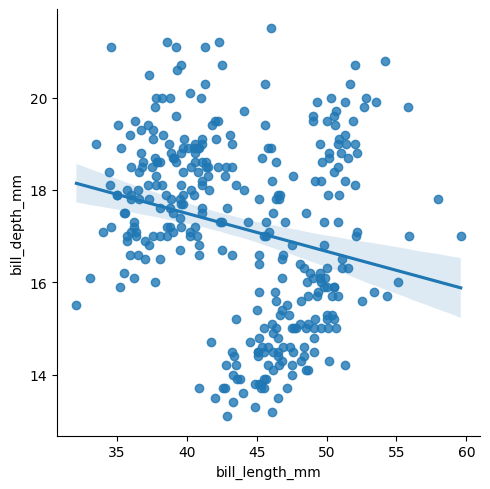

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
)

Limintaciones

In [ ]:
x=processed_penguins_df.bill_length_mm
y=processed_penguins_df.bill_depth_mm

res_x_y=scipy.stats.linregress(x=x,y=y)
res_y_x=scipy.stats.linregress(x=y,y=x)

print(f"res_x_y: {res_x_y}")
print(f"res_y_x: {res_y_x}")


res_x_y: LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
res_y_x: LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


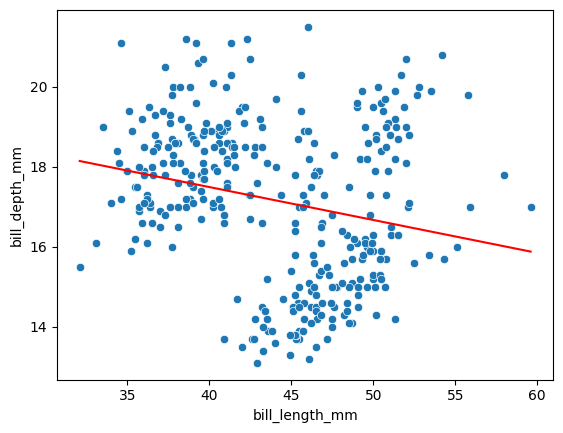

In [ ]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1=np.array([x.min(),x.max()])
fy_1=res_x_y.slope*fx_1+res_x_y.intercept
plt.plot(fx_1,fy_1,color="red")

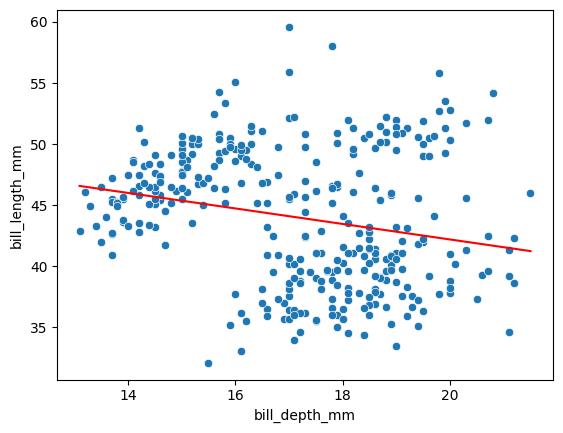

In [ ]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2=np.array([y.min(),y.max()])
fy_2=res_y_x.slope*fx_2+res_y_x.intercept
plt.plot(fx_2,fy_2,color="red")

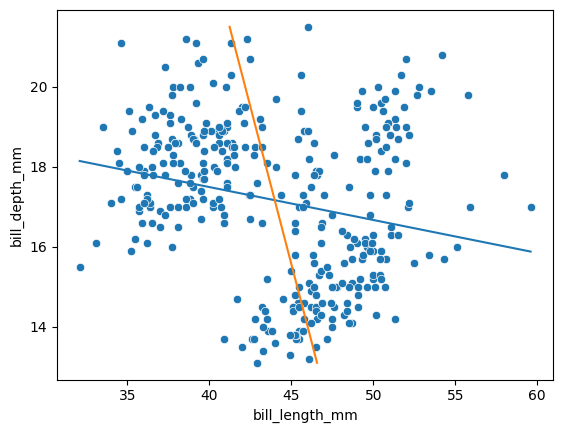

In [ ]:
sns.scatterplot(
    x=x,
    y=y
)
plt.plot(fx_1,fy_1)
plt.plot(fy_2,fx_2)

La regresion no nos dicen nada sobre la causalidad , pero existen herramientas para separar las relaciones entre multiples variables

In [ ]:
smf.ols("bill_depth_mm ~ bill_length_mm",data=processed_penguins_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           2.53e-05
Time:                        02:36:33   Log-Likelihood:                -688.72
No. Observations:                 333   AIC:                             1381.
Df Residuals:                     331   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.7866      0.854     24.335      0.000      19.106      22.467
bill_length_mm    -0.0823      0.019     -4.273      0.000      -0.120      -0.044
==============================================================================
Omnibus:                       15.442   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.783
Skew:                          -0.014   Prob(JB):                       0.0337
Kurtosis:                       2.301   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisis de regresion Multiple

Creacion de Modelos

In [ ]:
#Modelo 1
model_1=(
    smf.ols(
        formula="body_mass_g ~ bill_length_mm",
        data=processed_penguins_df
    )
    .fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           1.54e-32
Time:                        02:36:33   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Modelo 2
model_2=(
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm",
        data=processed_penguins_df
    )
    .fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           7.04e-46
Time:                        02:36:33   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Modelo 3
model_3=(
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + flipper_length_mm",
        data=processed_penguins_df
    )
    .fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     530.4
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          8.15e-104
Time:                        02:36:33   Log-Likelihood:                -2460.6
No. Observations:                 333   AIC:                             4927.
Df Residuals:                     330   BIC:                             4939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5836.2987    312.604    -18.670      0.000   -6451.246   -5221.352
bill_length_mm        4.9586      5.214      0.951      0.342      -5.297      15.214
flipper_length_mm    48.8897      2.034     24.034      0.000      44.888      52.891
==============================================================================
Omnibus:                        5.790   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.729
Skew:                           0.321   Prob(JB):                       0.0570
Kurtosis:                       3.031   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Modelo 4
model_4=(
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
        data=processed_penguins_df
    )
    .fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          6.28e-122
Time:                        02:36:33   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Modelo 5
model_5=(
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",
        data=processed_penguins_df
    )
    .fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          3.53e-118
Time:                        02:37:05   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Visualizacion de resultados

In [ ]:
models_result=pd.DataFrame(
    dict(
        actual_value=processed_penguins_df.body_mass_g,
        prediction_model_1=model_1.predict(),
        prediction_model_2=model_2.predict(),
        prediction_model_3=model_3.predict(),
        prediction_model_4=model_4.predict(),
        prediction_model_5=model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex
    )
)
models_result

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3206.616788,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3453.048687,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3897.022794,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3781.392446,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3647.615734,3764.536023,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4560.557415,4455.022405,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4255.118161,3894.857519,4080.099176,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3845.358402,4063.639819,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4682.433484,4652.013882,4803.806832,Chinstrap,male


<AxesSubplot: ylabel='Proportion'>

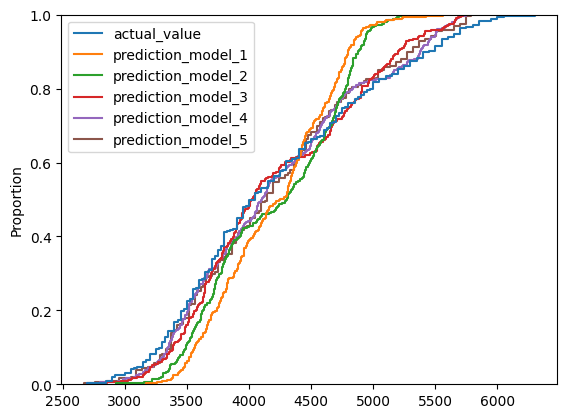

In [ ]:
#ECDFs
sns.ecdfplot(
    data=models_result

)

<AxesSubplot: ylabel='Proportion'>

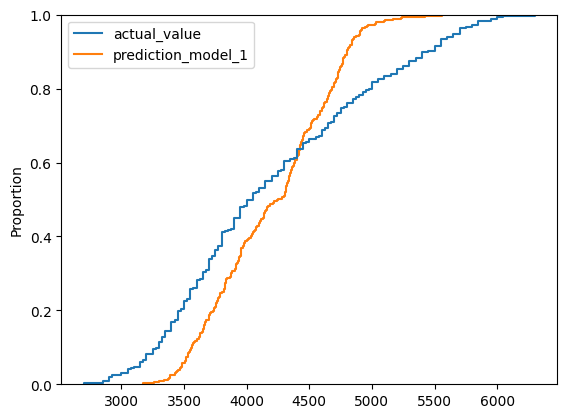

In [ ]:
#mismo grafico anterior pero actual modelo con las predicciones  1 por 1 en distintos paneles

sns.ecdfplot(
    data=models_result.select_columns(['actual_value','prediction_model_1'])
)



<AxesSubplot: ylabel='Proportion'>

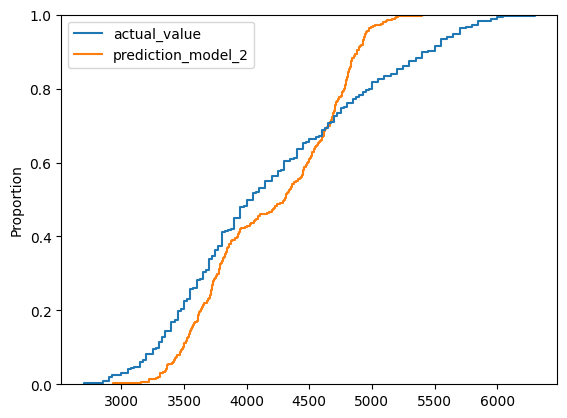

In [ ]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_value','prediction_model_2'])
)



<AxesSubplot: ylabel='Proportion'>

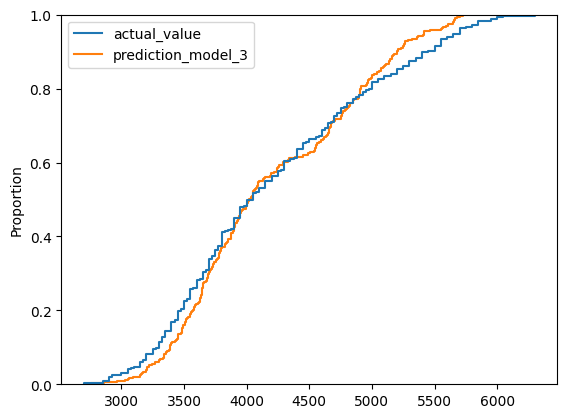

In [ ]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_value','prediction_model_3'])
)



<AxesSubplot: ylabel='Proportion'>

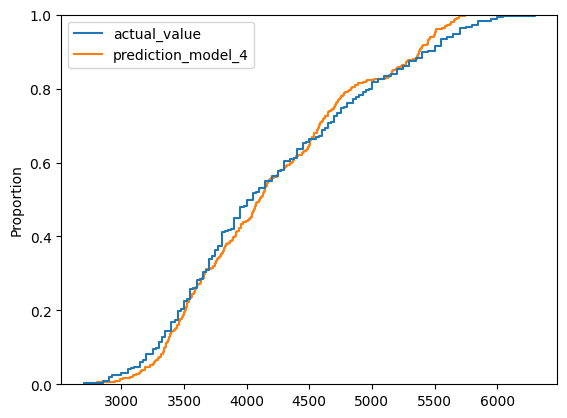

In [ ]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_value','prediction_model_4'])
)



<AxesSubplot: ylabel='Proportion'>

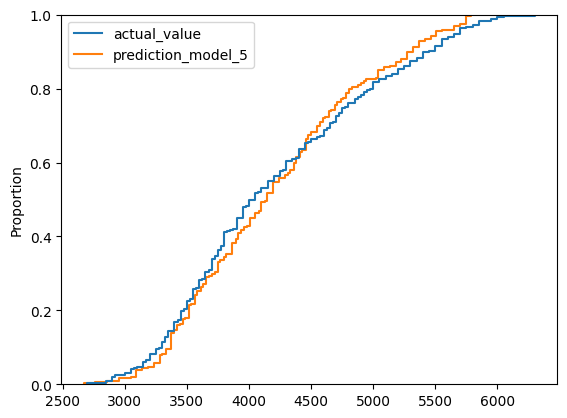

In [ ]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_value','prediction_model_5'])
)

pdfs

<AxesSubplot: ylabel='Density'>

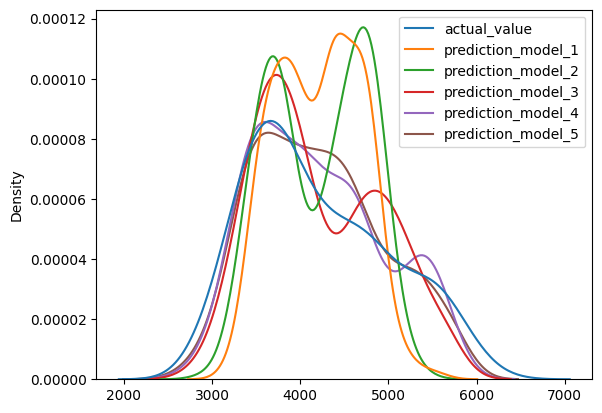

In [ ]:
sns.kdeplot(
    data=models_result
)

<AxesSubplot: ylabel='Density'>

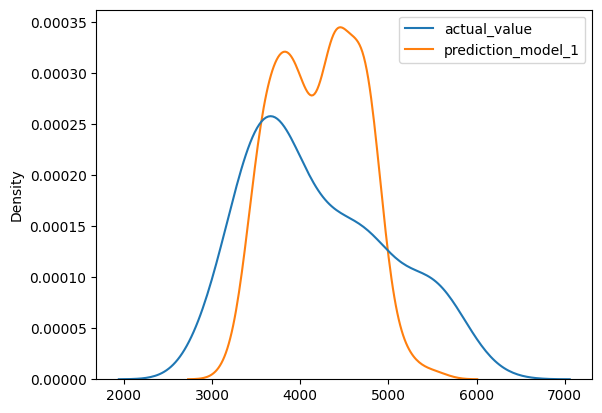

In [ ]:
sns.kdeplot(
    data=models_result.select_columns(['actual_value','prediction_model_1'])
)


<AxesSubplot: ylabel='Density'>

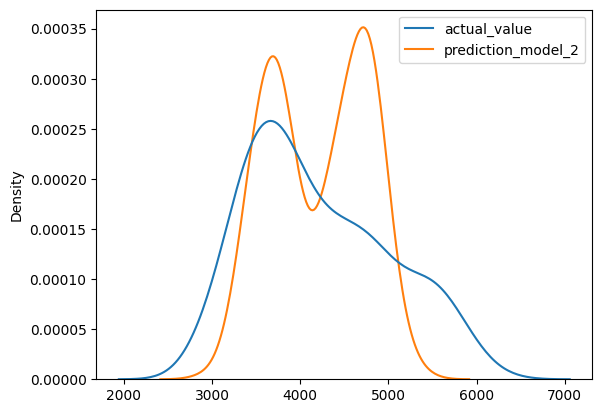

In [ ]:
sns.kdeplot(
    data=models_result.select_columns(['actual_value','prediction_model_2'])
)


<AxesSubplot: ylabel='Density'>

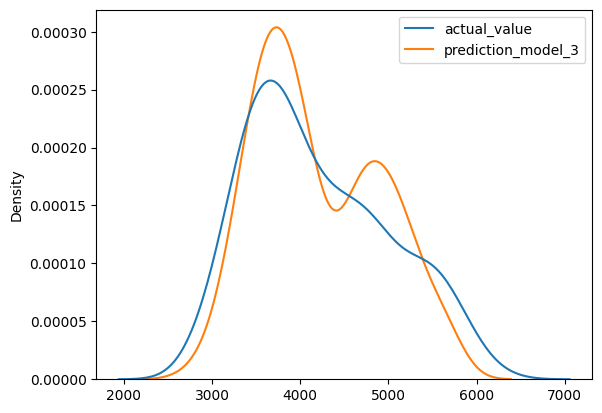

In [ ]:
sns.kdeplot(
    data=models_result.select_columns(['actual_value','prediction_model_3'])
)



<AxesSubplot: ylabel='Density'>

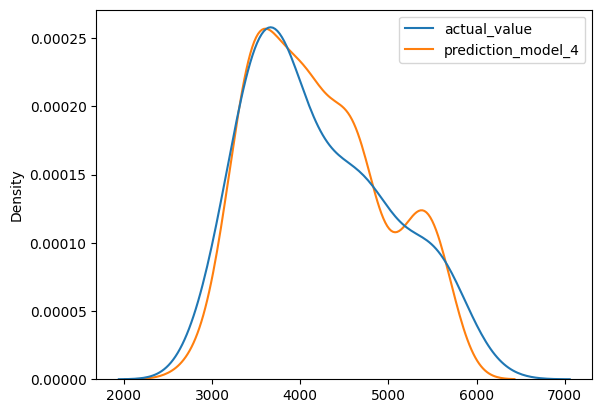

In [ ]:
sns.kdeplot(
    data=models_result.select_columns(['actual_value','prediction_model_4'])
)


<AxesSubplot: ylabel='Density'>

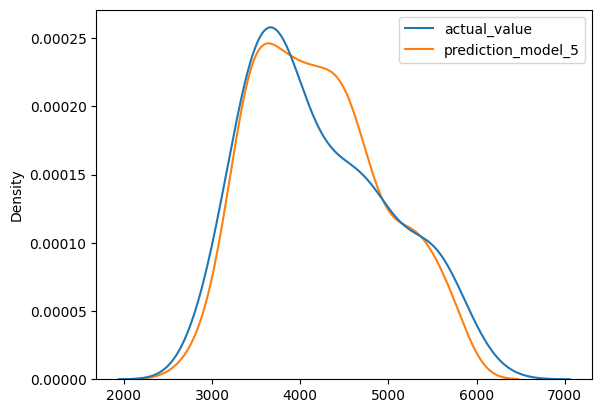

In [ ]:
sns.kdeplot(
    data=models_result.select_columns(['actual_value','prediction_model_5'])
)

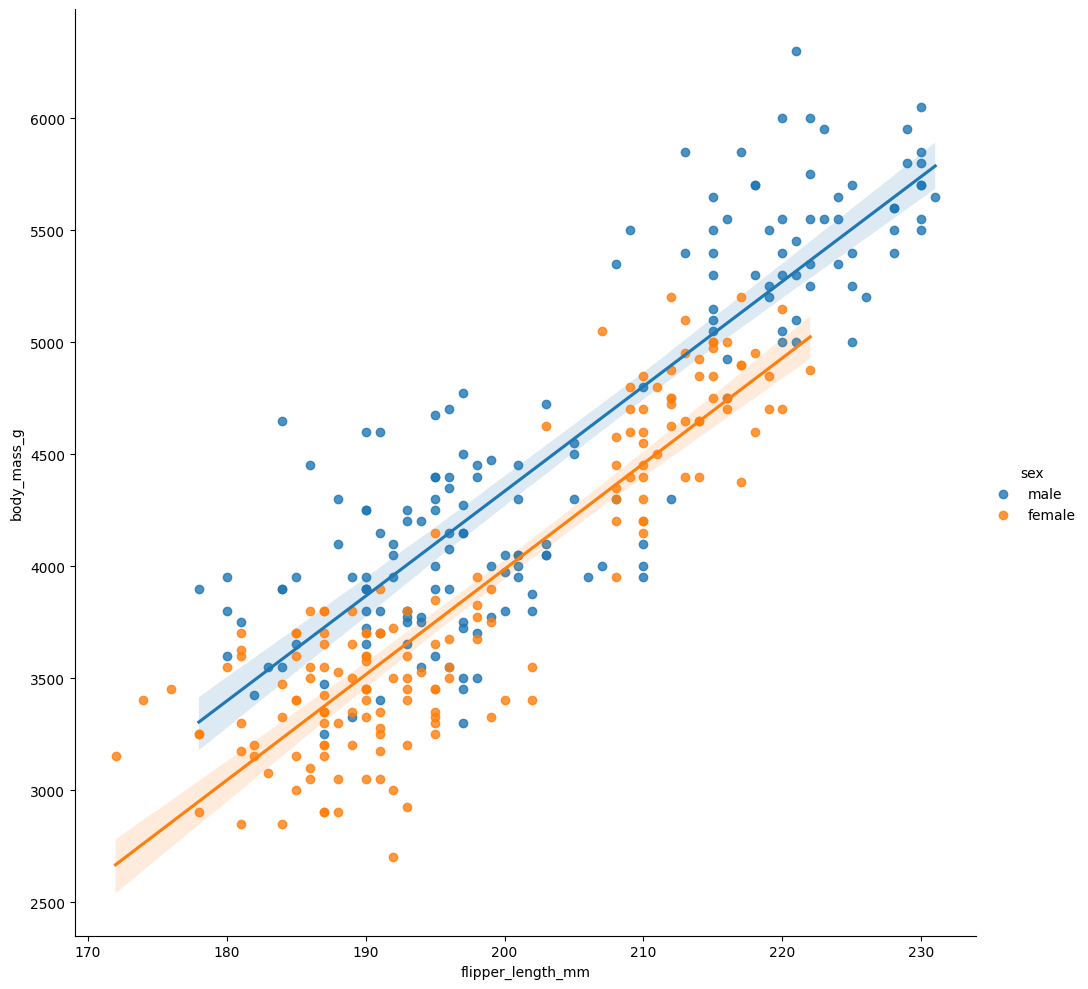

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="sex",
    height=10
)

# Regresion Logistica

In [ ]:
smf.logit(
    formula="numeric_sex ~ flipper_length_mm+ bill_length_mm +bill_depth_mm + C(island)",
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Sun, 18 Aug 2024   Pseudo R-squ.:                  0.4793
Time:                        03:11:00   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [ ]:
processed_penguins_df=(
    processed_penguins_df
    .assign(
        is_adelie=lambda df:df["species"].replace(["Adelie","Gentoo","Chinstrap"],[1,0,0])
        )
)


In [ ]:
model_is_adeline=smf.logit(
    formula="is_adelie ~ flipper_length_mm+ C(sex)",
    data=processed_penguins_df
    ).fit()

model_is_adeline.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [ ]:
is_adeline_df_predictions=pd.DataFrame(
    dict(
        actual_adelie=processed_penguins_df.is_adelie,
        prediction_values=model_is_adeline.predict().round()
    )
)

is_adeline_df_predictions

,actual_adelie,prediction_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [ ]:
is_adeline_df_predictions.value_counts(['actual_adelie','prediction_values']).reset_index(name="count")

,actual_adelie,prediction_values,count
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


<img src="image-20240817-223700.png" width="" align="" />

In [ ]:
!pip install pandas_profiling==3.6.6

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.9.0-py2.py3-none-any.whl (356 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Using cached phik-0.12.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (686 kB)
  Using cached PyYAML-6.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (737 kB)
  Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Using cached wordcloud-1.9.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (513 kB)
  Using cached typeguard-4.3.0-py3-none-any.whl (35 kB)
  Using cached pydantic-2.8.2-py3-none-any.whl (423 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached multimethod-1.12-py3-none-any.whl (10 kB)
  Using cached numba-0.60.0-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
  Using cached pywavelets-1.6.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
  Using cached llvmlite-0.43.0-cp39-cp39-manylinux_

In [ ]:
import palmerpenguins
import pandas as pd
from ydata_profiling import ProfileReport

df = palmerpenguins.load_penguins()

profile = ProfileReport(df)
profile.to_file("penguins_report.html")

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'Buffer' from 'typing_extensions' (/shared-libs/python3.9/py/lib/python3.9/site-packages/typing_extensions.py)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8db16cf-9368-486a-9797-188e5f936d0e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>